In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv("student_habits_performance.csv")

# Keep only numeric columns
numerical_df = df.select_dtypes(include=['number'])

# Confirm remaining columns are all numeric
print("Numeric columns used for clustering:", numerical_df.columns.tolist())

# Handle missing values
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numerical_df)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)


Numeric columns used for clustering: ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Check how much variance is explained
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.21556281 0.11979628]


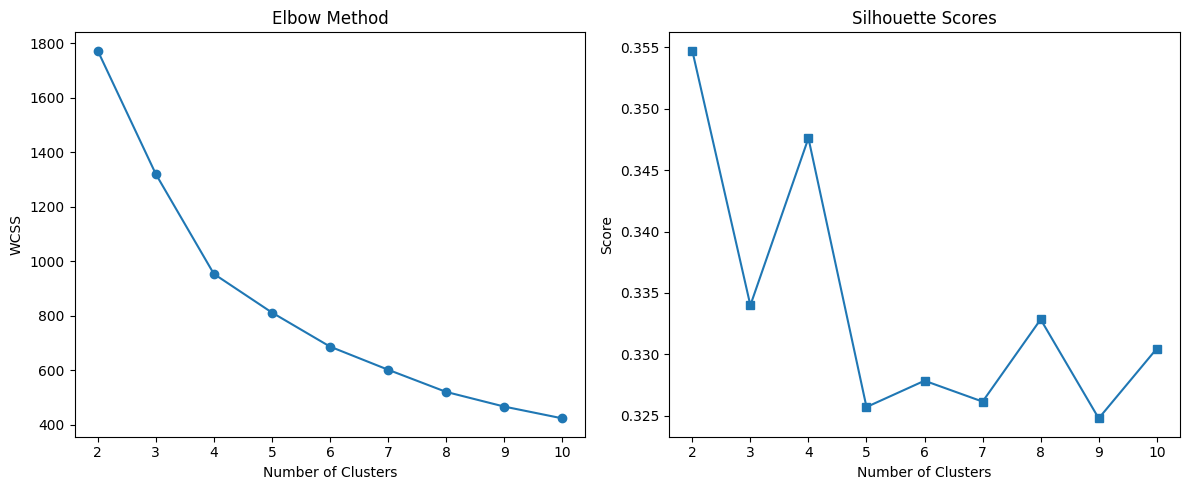

In [9]:
# Used Chat-GPT
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='s')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [10]:
# Let's say k=3 based on your analysis
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(pca_data)


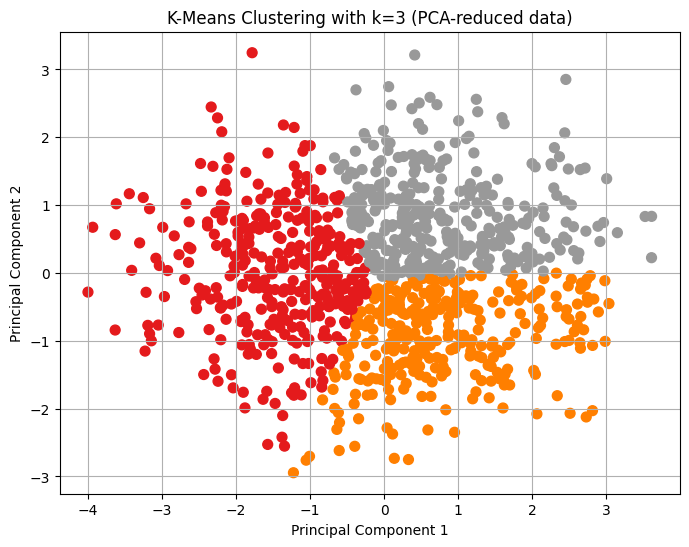

In [8]:
# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='Set1', s=50)
plt.title(f'K-Means Clustering with k={optimal_k} (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
